<a href="https://colab.research.google.com/github/chathurapr/DSA-Code/blob/main/Patent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Importing the necessary python libraries

import os
import nltk
nltk.download('punkt')
import nltk.corpus
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# Importing the dataset as a document

df = pd.read_csv("/content/sample_data/Patent.csv", encoding='cp1252')
print(df.columns)




Index(['Publication Number', 'Title - DWPI', 'Title (English)',
       'Title Terms - DWPI', 'Abstract (English)', 'Abstract - DWPI Novelty',
       'Abstract - DWPI Use', 'Abstract - DWPI Advantage',
       'Abstract - DWPI Tech Focus', 'Claims',
       ...
       'Abstract - DWPI Mechanism', 'Abstract - DWPI Drawing Description',
       'INPADOC Legal Status Code', 'INPADOC Legal Status Date',
       'INPADOC Legal Status Impact', 'INPADOC Legal Status Text',
       'INPADOC Legal Status Assignee', 'INPADOC Legal Status Remarks',
       'Gov't Interest (US)', 'Language of Publication'],
      dtype='object', length=190)


In [17]:
# Considering the title in english coloumn as the input data field

title_eng = df["Title (English)"]
print(title_eng[0])

DISTRIBUTED ASYNCHRONOUS PARALLELIZED ENSEMBLE MODEL TRAINING AND INFERENCE SYSTEM ON THE BLOCKCHAIN NETWORK AND METHOD THEREOF


In [25]:
#Tokenizing the words in each title
token_list = []

for row in title_eng:
  token_list.append(nltk.word_tokenize(row))

print(token_list[6])

['METHOD', 'FOR', 'PROVIDING', 'INTEGRATED', 'AUTHENTICATION', 'SERVICE', 'BASED', 'ON', 'BLOCKCHAIN']


In [ ]:
# Importing the StopWords library from nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Removing puntuation marks from the corpus
def remove_punctuation(words):
    
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Removing stopwords from the corpus
def remove_stopwords(words):
    
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
            
    return filtered_words

import regex as re


new_token_list=[]


for token in token_list:
    new_token_list.append(remove_stopwords(remove_punctuation(token)))

clean_corpus=[]
for tokens in new_token_list:
    clean_sentence=" ".join([token for token in tokens])
    clean_corpus.append(clean_sentence)
clean_corpus

['Title D',
 'System performing ensemble learning inference asynchronous distributed parallel manner work request node storing learning data learning algorithm distributed file system shares resource blockchain node',
 'Smart contract system guaranteeing correctness document contract fastened online determines documents data corresponding hash value truth registered determines imitation registered',
 'Distributed computer architecture enabling traceability credit tokenization messaging infrastructure configured provide message exchange distributed ledger platform centralized business logic platform',
 'Method performing slice provider network operator device 5G communication network involves causing allocation record stored permissioned blockchain allocation record memorializes smart contract',
 'Artificial intelligencebased cryptocurrency integrated brokerage transaction system transaction processing unit proivded charging converted fiat currency preset system account respectively sal

In [ ]:
# Constructing a basic Count Vectorizer - (Vector based on word count)

from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

vect.fit(clean_corpus)

CountVectorizer()

In [ ]:
#Identified Keywords

vect.get_feature_names()

['20',
 '3d',
 '4th',
 '5g',
 'aadhaar',
 'aba',
 'abi',
 'abievoting',
 'ability',
 'able',
 'abnormal',
 'abnormality',
 'absence',
 'abstract',
 'academic',
 'accelerated',
 'accept',
 'acceptable',
 'acceptance',
 'accepting',
 'accepts',
 'access',
 'accessed',
 'accesses',
 'accessibility',
 'accessible',
 'accessing',
 'accessory',
 'accessrestricted',
 'accident',
 'accommodation',
 'accordance',
 'according',
 'account',
 'accountability',
 'accountably',
 'accounting',
 'accountlinked',
 'accounts',
 'accountslice',
 'accredited',
 'accrued',
 'accumulate',
 'accumulated',
 'accumulating',
 'accumulation',
 'accumulator',
 'accuracy',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achieving',
 'acknowledgement',
 'acknowledgment',
 'acoustic',
 'acquire',
 'acquired',
 'acquirer',
 'acquires',
 'acquiring',
 'acquisition',
 'across',
 'act',
 'acting',
 'action',
 'actional',
 'actions',
 'actiontype',
 'activate',
 'activated',
 'activates',
 'activating',
 'act

In [ ]:
# Constructing 2d array of words and documents
matrix=vect.transform(clean_corpus)

In [ ]:
# Constructing a Count Vector Matrix

title_df=pd.DataFrame(matrix.toarray(), columns=vect.get_feature_names())
title_df

,20,3d,4th,5g,aadhaar,aba,abi,abievoting,ability,able,...,yen,yield,ywords,zero,zeroknowledge,zeroloss,zigbee,zkpenabled,zone,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Constructing a TF-IDF matrix to decide technical values

from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()

vect.fit(clean_corpus)

TfidfVectorizer()

In [ ]:
matrix=vect.transform(clean_corpus)

In [ ]:
title_tfidf_df=pd.DataFrame(matrix.toarray(), columns=vect.get_feature_names())
title_tfidf_df

,20,3d,4th,5g,aadhaar,aba,abi,abievoting,ability,able,...,yen,yield,ywords,zero,zeroknowledge,zeroloss,zigbee,zkpenabled,zone,zones
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.301992,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4352,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4353,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4354,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Retrieving the relativiry of keywords after tf-idf
title_tfidf_df.iloc[1].sort_values(ascending=False)

learning      0.606786
ensemble      0.298643
inference     0.260872
shares        0.240033
manner        0.237042
                ...   
exhibiting    0.000000
exhibit       0.000000
exhaustion    0.000000
exercise      0.000000
zones         0.000000
Name: 1, Length: 6279, dtype: float64

In [ ]:
title_tfidf_df["5g"]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.301992
          ...   
4351    0.000000
4352    0.000000
4353    0.000000
4354    0.000000
4355    0.000000
Name: 5g, Length: 4356, dtype: float64

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Similarity betweene vectors - Constructing a Simmilarity matrix using cosine similarity

cosine_sim = cosine_similarity(title_tfidf_df)
csim_df = pd.DataFrame(cosine_sim)
csim_df

,0,1,2,3,4,5,6,7,8,9,...,4346,4347,4348,4349,4350,4351,4352,4353,4354,4355
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.016468,0.045879,0.019096,0.022134,0.034670,0.000000,0.012322,0.000000,...,0.012564,0.060670,0.000000,0.050646,0.072246,0.008558,0.013130,0.000000,0.000000,0.000000
2,0.0,0.016468,1.000000,0.000000,0.038620,0.011182,0.028884,0.039236,0.040893,0.010274,...,0.012694,0.024001,0.000000,0.017360,0.021113,0.004323,0.000000,0.000000,0.000000,0.000000
3,0.0,0.045879,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.021939,0.000000,0.028139,0.026392,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.019096,0.038620,0.000000,1.000000,0.000000,0.040271,0.051358,0.023680,0.029605,...,0.000000,0.040321,0.000000,0.022638,0.020972,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,0.0,0.008558,0.004323,0.000000,0.000000,0.027622,0.000000,0.000000,0.000000,0.017274,...,0.045686,0.004092,0.000000,0.029448,0.004923,1.000000,0.059021,0.019465,0.000000,0.000000
4352,0.0,0.013130,0.000000,0.000000,0.000000,0.000000,0.016331,0.000000,0.000000,0.008840,...,0.000000,0.012557,0.000000,0.000000,0.046545,0.059021,1.000000,0.009960,0.000000,0.000000
4353,0.0,0.000000,0.000000,0.000000,0.000000,0.033036,0.000000,0.000000,0.000000,0.009373,...,0.000000,0.000000,0.063990,0.000000,0.000000,0.019465,0.009960,1.000000,0.007105,0.008152
4354,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006306,...,0.000000,0.000000,0.031197,0.000000,0.000000,0.000000,0.000000,0.007105,1.000000,0.232331


In [ ]:
# Constructing the Dissimilarity matrix/distance matrix

from sklearn.metrics import pairwise_distances

import numpy as np

cosine_dis = pairwise_distances(csim_df)
cosine_dis_df = pd.DataFrame(cosine_dis)
cosine_dis_df

,0,1,2,3,4,5,6,7,8,9,...,4346,4347,4348,4349,4350,4351,4352,4353,4354,4355
0,0.000000,3.150361e+00,2.730794e+00,2.987721e+00,2.967235,3.427496,3.999095,3.143331,3.133434,2.846873,...,2.905428,2.739427,1.739976,2.773317,4.055743,2.915392e+00,2.102355,1.873466e+00,1.758785,1.756238
1,3.150361,1.576991e-07,3.064393e+00,3.033149e+00,2.923327,3.400356,3.881999,3.508393,2.978595,3.091723,...,3.094490,2.511234,2.960324,2.732365,3.160942,3.116818e+00,2.913188,2.985774e+00,3.060764,3.038678
2,2.730794,3.064393e+00,1.192093e-07,3.278334e+00,2.669930,3.462768,3.731848,3.311734,2.814839,2.905927,...,3.054409,2.745802,2.634488,2.852241,3.778500,3.105709e+00,2.734083,2.663876e+00,2.692019,2.692215
3,2.987721,3.033149e+00,3.278334e+00,1.115101e-07,3.206065,3.624572,4.148332,3.498145,3.385496,3.257831,...,3.317543,2.980551,2.894044,3.078530,3.803135,3.349962e+00,3.011763,2.956161e+00,2.972140,2.961162
4,2.967235,2.923327e+00,2.669930e+00,3.206065e+00,0.000000,3.385999,3.701753,3.205771,2.901219,2.789957,...,3.156403,2.738923,2.826638,2.886358,3.603721,3.151748e+00,2.881100,2.849717e+00,2.915234,2.907855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,2.915392,3.116818e+00,3.105709e+00,3.349962e+00,3.151748,3.230325,3.901094,3.473934,3.094234,2.764225,...,3.107714,3.008818,2.568989,2.897671,3.839370,1.192093e-07,2.312798,2.473946e+00,2.720723,2.678115
4352,2.102355,2.913188e+00,2.734083e+00,3.011763e+00,2.881100,3.306757,3.792412,3.177835,2.937726,2.621109,...,2.890891,2.623134,1.920640,2.712734,3.700246,2.312798e+00,0.000000,1.918305e+00,2.024641,1.992261
4353,1.873466,2.985774e+00,2.663876e+00,2.956161e+00,2.849717,3.123061,3.830285,3.064569,2.940564,2.569892,...,2.810949,2.635975,1.632606,2.656537,3.834459,2.473946e+00,1.918305,5.161914e-08,1.809170,1.784659
4354,1.758785,3.060764e+00,2.692019e+00,2.972140e+00,2.915234,3.374150,3.915668,3.136009,3.038843,2.714154,...,2.865577,2.646342,1.568788,2.704864,3.933042,2.720723e+00,2.024641,1.809170e+00,0.000000,1.250351


In [ ]:
# Convert the Dataframe to 2-D array

dataset = cosine_dis_df.to_numpy()

In [ ]:
# Importing clustering libraries from scipy and sklearn

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

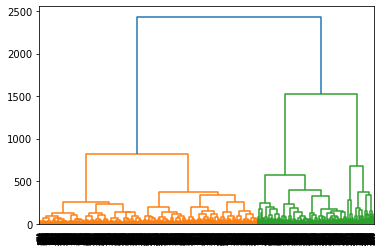

In [ ]:
# Constructing a dendrogram to identify clusters 

dendrogram = sch.dendrogram(sch.linkage(cosine_dis_df, method="ward"))

In [ ]:
# Importing matplotlib to visualize outputs

import matplotlib.pyplot as plt

In [ ]:
# Convert the Dataframe to 2-D array

cosine_dis_df.to_numpy()

array([[0.00000000e+00, 3.15036094e+00, 2.73079358e+00, ...,
        1.87346607e+00, 1.75878503e+00, 1.75623836e+00],
       [3.15036094e+00, 1.57699067e-07, 3.06439324e+00, ...,
        2.98577389e+00, 3.06076391e+00, 3.03867836e+00],
       [2.73079358e+00, 3.06439324e+00, 1.19209290e-07, ...,
        2.66387598e+00, 2.69201890e+00, 2.69221472e+00],
       ...,
       [1.87346607e+00, 2.98577389e+00, 2.66387598e+00, ...,
        5.16191366e-08, 1.80916968e+00, 1.78465922e+00],
       [1.75878503e+00, 3.06076391e+00, 2.69201890e+00, ...,
        1.80916968e+00, 0.00000000e+00, 1.25035150e+00],
       [1.75623836e+00, 3.03867836e+00, 2.69221472e+00, ...,
        1.78465922e+00, 1.25035150e+00, 0.00000000e+00]])

In [ ]:
points = dataset
points

array([[0.00000000e+00, 3.15036094e+00, 2.73079358e+00, ...,
        1.87346607e+00, 1.75878503e+00, 1.75623836e+00],
       [3.15036094e+00, 1.57699067e-07, 3.06439324e+00, ...,
        2.98577389e+00, 3.06076391e+00, 3.03867836e+00],
       [2.73079358e+00, 3.06439324e+00, 1.19209290e-07, ...,
        2.66387598e+00, 2.69201890e+00, 2.69221472e+00],
       ...,
       [1.87346607e+00, 2.98577389e+00, 2.66387598e+00, ...,
        5.16191366e-08, 1.80916968e+00, 1.78465922e+00],
       [1.75878503e+00, 3.06076391e+00, 2.69201890e+00, ...,
        1.80916968e+00, 0.00000000e+00, 1.25035150e+00],
       [1.75623836e+00, 3.03867836e+00, 2.69221472e+00, ...,
        1.78465922e+00, 1.25035150e+00, 0.00000000e+00]])

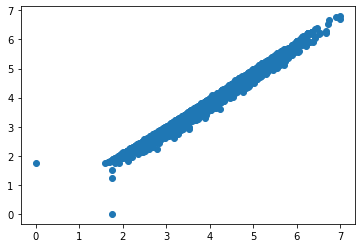

In [ ]:
# Scatter plot to visualize distance between keywords

plt.scatter(dataset[:,0], dataset[:,-1])

In [ ]:
# Constructing a hierarchial clustering object using linkage method

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage="ward")

NameError: name 'AgglomerativeClustering' is not defined

In [ ]:
y_hc = hc.fit_predict(cosine_dis_df.to_numpy())

In [ ]:
# Visualizing the clusters in a scatter plot

plt.scatter(points[y_hc == 0,0], points[y_hc == 0,1], s=100, c="cyan")
plt.scatter(points[y_hc == 1,0], points[y_hc == 1,1], s=100, c="yellow")
plt.scatter(points[y_hc == 2,0], points[y_hc == 2,1], s=100, c="magenta")

NameError: name 'plt' is not defined